In [45]:
import torch 
from torch import nn 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt 



In [46]:
training_data = datasets.FashionMNIST(
        root="data",
        train= True,
        download = True,
        transform = ToTensor(),
        target_transform=None
)

testing_data = datasets.FashionMNIST(
        root="data",
        train=False,
        download = True,
        transform= ToTensor()
)

In [47]:
# See first training sample
image, label = training_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [48]:
image.shape

torch.Size([1, 28, 28])

In [49]:
# How many samples are there? 
len(training_data.data), len(training_data.targets), len(testing_data.data), len(testing_data.targets)

(60000, 60000, 10000, 10000)

In [50]:
# See classes
class_names = training_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [51]:
class_to_indx = training_data.class_to_idx
class_to_indx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

Image shape: torch.Size([1, 28, 28])


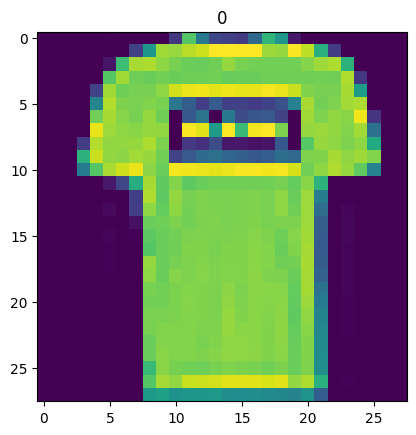

In [52]:
import matplotlib.pyplot as plt
image, label = training_data[1]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);

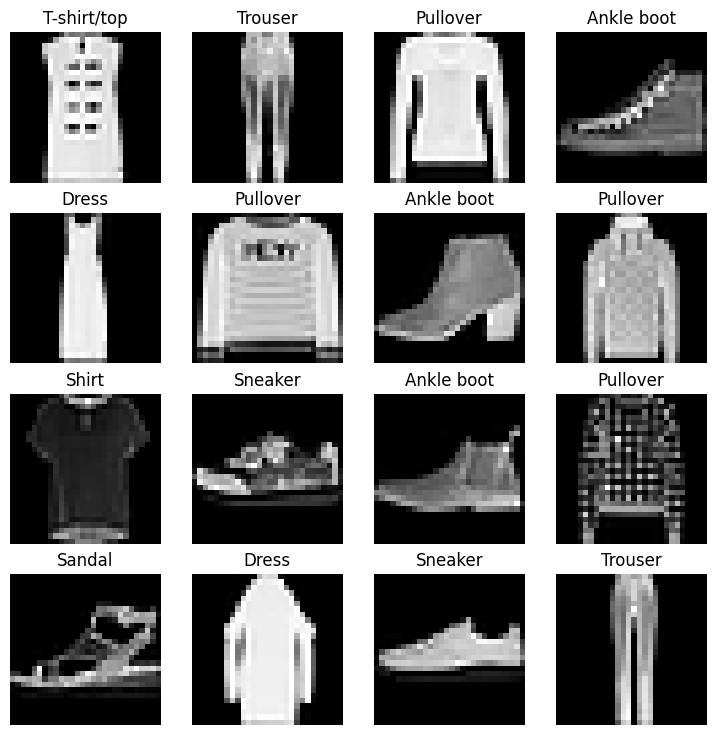

In [53]:
#torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows,cols = 4,4
for i in range(1,rows*cols+1):
    random_idx = torch.randint(0,len(training_data),size=[1]).item()
    img, label = training_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(),cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

In [54]:
print(training_data)
print(testing_data)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [55]:
from torch.utils.data import DataLoader
BATCH_SIZE =128
training_dataloader = DataLoader(dataset=training_data,batch_size=BATCH_SIZE,
                                 shuffle= True)

In [56]:
test_dataloader = DataLoader(dataset=testing_data,batch_size=96,shuffle=False)

In [57]:
print(len(training_dataloader))

469


In [58]:
train_feature_batch, train_labels_batch = next(iter(training_dataloader))
train_feature_batch.shape

torch.Size([128, 1, 28, 28])

In [59]:
#create flatten layer

flatten_model = nn.Flatten()

from torch import nn


class FashionMNIST_model(nn.Module):
    def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features= hidden_units),
            nn.Linear(in_features= hidden_units,
                      out_features=output_shape)
        )
    def forward(self,x):
        return self.layer_stack(x)
    



In [60]:
torch.manual_seed(42)

model_MNIST = FashionMNIST_model(input_shape=784,hidden_units=10,output_shape=len(class_names))

model_MNIST.to("cpu")

FashionMNIST_model(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [61]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_MNIST.parameters(),lr=0.1)

In [62]:
#time our learning
from timeit import default_timer as timer
def print_train_time(start:float,end:float,device:torch.device=None):
    total_time = end-start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time



In [85]:
from tqdm.auto import tqdm
torch.manual_seed(42)
start_time = timer()
epochs= 4

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch} \n-------------")
    train_loss = 0
    for batch,(X,y) in enumerate(training_dataloader):
        model_MNIST.train()
        
        y_pred = model_MNIST(X)

        loss = loss_fn(y_pred,y)

        train_loss += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch% 100==0:
            print(f"looked at {batch * len(X)}/{len(training_dataloader.dataset)} samples.")

    train_loss /=  len(training_dataloader)
    test_loss,test_acc = 0,0
    model_MNIST.eval()
    with torch.inference_mode():
        for X_test,y_test in test_dataloader:
            test_pred = model_MNIST(X_test)
            test_loss+=loss_fn(test_pred,y_test)
            test_acc += accuracy_fn(y_test,test_pred.argmax(dim=1))
        test_loss /= len(testing_data)
        test_acc /= len(test_dataloader)

    print(f"Train loss:{train_loss: .4f} | Test loss:{test_loss: .4f}, Test acc: {test_acc:.4f}")
end_time = timer()
total_train_time_v0=print_train_time(start_time,end_time,"cpu")

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch: 0 
-------------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.
Train loss: 0.4329 | Test loss: 0.0049, Test acc: 83.4623
Epoch: 1 
-------------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.
Train loss: 0.4328 | Test loss: 0.0049, Test acc: 83.4623
Epoch: 2 
-------------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.
Train loss: 0.4328 | Test loss: 0.0049, Test acc: 83.4623
Epoch: 3 
-------------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.
Train loss: 0.4328 | Test loss: 0.0049, Test acc: 83.4623
Train time on cpu: 22.059 seconds


In [64]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)
            
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_MNIST, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'FashionMNIST_model',
 'model_loss': 0.4698370695114136,
 'model_acc': 83.46230158730157}

In [65]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [66]:
#lets run with cuda and better model

class model_MNIST_V2(nn.Module):
    def __init__(self, input_shape:int,hidden_units:int,output_shape:int):
        super().__init__()
        self.layer_stack= nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                       out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features= output_shape ),
            nn.ReLU()
        )

    def forward(self,x:torch.Tensor):
        return self.layer_stack(x)
    
        




In [67]:
torch.manual_seed(42)
new_model = model_MNIST_V2(input_shape=784,hidden_units=10,output_shape=len(class_names)).to(device)
next(new_model.parameters()).device

device(type='cuda', index=0)

In [68]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=new_model.parameters(),lr = 0.1)



In [69]:
from tqdm.auto import tqdm
torch.manual_seed(42)
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device = device):

    train_loss,train_acc=0,0
    model.to(device)
    model.train()
    for batch, (X,y) in enumerate(data_loader):
        X,y = X.to(device),y.to(device)
        y_pred=model(X)
        loss = loss_fn(y_pred,y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch% 100==0:
           print(f"looked at {batch * len(X)}/{len(data_loader)} samples.")
    train_loss /= len(data_loader)
    train_acc/= len(data_loader)
    print(f"Train_loss: {train_loss:.5f}| Training acc: {train_acc:.2f}%")





In [70]:
def test_step(data_loader: torch.utils.data.DataLoader,
              model: nn.Module,
              loss_fn:nn.Module,
              accuracy_fn,
              device: torch.device= device):
    test_loss,test_acc = 0,0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            X, y = X.to(device), y.to(device)
            test_pred = model(X)
            
            # Accumulate the loss and accuracy values per batch
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, 
                                y_pred=test_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
        
        # Scale loss and acc to find the average loss/acc per batch
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": test_loss,
            "model_acc": test_acc}

In [71]:
from timeit import default_timer as timer
train_time__start_on_gpu=timer()

epochs = 4

for epoch in tqdm(range(epochs)):
    print(f"Epoch:{epoch}\n-------------")
    train_step(data_loader=training_dataloader,
               model=new_model,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(data_loader=test_dataloader,
              model=new_model,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device
              )
    
 
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time__start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:0
-------------
looked at 0/469 samples.
looked at 12800/469 samples.
looked at 25600/469 samples.
looked at 38400/469 samples.
looked at 51200/469 samples.
Train_loss: 1.21539| Training acc: 58.64%
Epoch:1
-------------
looked at 0/469 samples.
looked at 12800/469 samples.
looked at 25600/469 samples.
looked at 38400/469 samples.
looked at 51200/469 samples.
Train_loss: 0.96327| Training acc: 65.13%
Epoch:2
-------------
looked at 0/469 samples.
looked at 12800/469 samples.
looked at 25600/469 samples.
looked at 38400/469 samples.
looked at 51200/469 samples.
Train_loss: 0.91870| Training acc: 66.52%
Epoch:3
-------------
looked at 0/469 samples.
looked at 12800/469 samples.
looked at 25600/469 samples.
looked at 38400/469 samples.
looked at 51200/469 samples.
Train_loss: 0.90089| Training acc: 66.86%
Train time on cuda: 24.770 seconds


In [72]:
print_train_time(start_time,end_time,"cpu")
print_train_time(train_time__start_on_gpu,train_time_end_on_gpu,device)


Train time on cpu: 21.387 seconds
Train time on cuda: 24.770 seconds


24.77046600000176

In [73]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            X,y = X.to(device),y.to(device)
            y_pred = model(X)
            
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
#model_0_results = eval_model(model=model_MNIST, data_loader=test_dataloader,loss_fn=loss_fn, accuracy_fn=accuracy_fn)
#model_0_results

In [74]:
#get new_mdeol results dict
#in first attemp we got error because of cpu and gpu missmatches
new_model_results = eval_model(model=new_model,
                               data_loader=test_dataloader,
                               loss_fn=loss_fn,
                               accuracy_fn=accuracy_fn)
print(new_model_results)
print(model_0_results)

{'model_name': 'model_MNIST_V2', 'model_loss': 0.9036804437637329, 'model_acc': 66.56746031746032}
{'model_name': 'FashionMNIST_model', 'model_loss': 0.4698370695114136, 'model_acc': 83.46230158730157}


In [75]:
# Create a convolutional neural network 
class CNN_model(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            #nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            #nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_cnn = CNN_model(input_shape=1, 
    hidden_units=18, 
    output_shape=len(class_names)).to(device)
model_cnn

CNN_model(
  (block_1): Sequential(
    (0): Conv2d(1, 18, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(18, 18, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(18, 18, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(18, 18, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=882, out_features=10, bias=True)
  )
)

In [76]:
image.shape

torch.Size([1, 28, 28])

In [77]:
torch.manual_seed(42)


In [78]:
loss_fn = nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_cnn.parameters(),lr = 0.09)

In [79]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model 
epochs = 8
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=training_dataloader, 
        model=model_cnn, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_cnn,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
        
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 0
---------
looked at 0/469 samples.
looked at 12800/469 samples.
looked at 25600/469 samples.
looked at 38400/469 samples.
looked at 51200/469 samples.
Train_loss: 0.75479| Training acc: 72.84%
Epoch: 1
---------
looked at 0/469 samples.
looked at 12800/469 samples.
looked at 25600/469 samples.
looked at 38400/469 samples.
looked at 51200/469 samples.
Train_loss: 0.39578| Training acc: 85.65%
Epoch: 2
---------
looked at 0/469 samples.
looked at 12800/469 samples.
looked at 25600/469 samples.
looked at 38400/469 samples.
looked at 51200/469 samples.
Train_loss: 0.34112| Training acc: 87.78%
Epoch: 3
---------
looked at 0/469 samples.
looked at 12800/469 samples.
looked at 25600/469 samples.
looked at 38400/469 samples.
looked at 51200/469 samples.
Train_loss: 0.31204| Training acc: 88.81%
Epoch: 4
---------
looked at 0/469 samples.
looked at 12800/469 samples.
looked at 25600/469 samples.
looked at 38400/469 samples.
looked at 51200/469 samples.
Train_loss: 0.29301| Training ac

In [80]:
# Get model_2 results 
model_2_results = eval_model(
    model=model_cnn,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results



{'model_name': 'CNN_model',
 'model_loss': 0.28208252787590027,
 'model_acc': 89.66269841269839}

In [89]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results,model_2_results,new_model_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNIST_model,0.469837,83.462302
1,CNN_model,0.282083,89.662698
2,model_MNIST_V2,0.903680,66.567460


In [90]:
compare_results["training_time"] = [total_train_time_v0,total_train_time_model_2,total_train_time_model_1]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNIST_model,0.469837,83.462302,22.058570
1,CNN_model,0.282083,89.662698,52.586252
2,model_MNIST_V2,0.903680,66.567460,24.770466


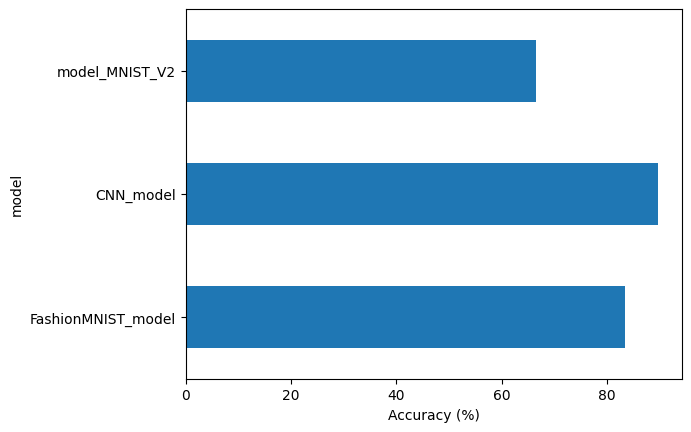

In [112]:
#lets visualize
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("Accuracy (%)")
plt.ylabel("model");

In [113]:
def make_prediction(model:torch.nn.Module,
                    data:list,
                    device:torch.device=device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample,dim=0).to(device)
            pred_logit=model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)
            pred_probs.append(pred_prob.cpu())
    return torch.stack(pred_probs)


In [123]:
import random
#random.seed(42)
test_samples=[]
test_labes=[]
for sample,label in random.sample(list(testing_data),k=15):
    test_samples.append(sample)
    test_labes.append(label)
test_samples[0].shape


torch.Size([1, 28, 28])

In [124]:
pred_probs = make_prediction(model=model_cnn,data=test_samples)
#conver prediction to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes


tensor([0, 1, 1, 5, 2, 0, 1, 2, 2, 1, 4, 4, 5, 6, 6])

In [125]:
test_labes

[0, 1, 1, 5, 2, 0, 1, 2, 2, 1, 4, 4, 5, 6, 6]

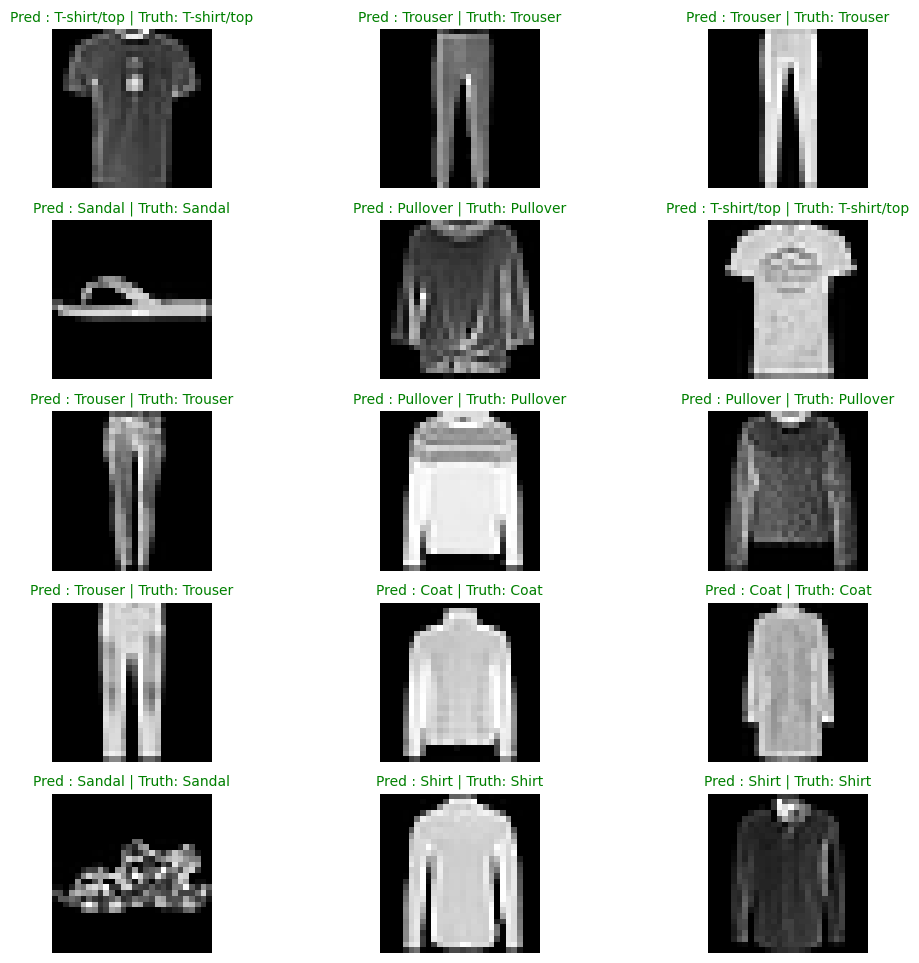

In [126]:
plt.figure(figsize=(12,12))
n_rows = 5
n_cols = 3
for i,sample in enumerate(test_samples):
    plt.subplot(n_rows,n_cols,i+1)
    plt.imshow(sample.squeeze(),cmap = "gray")
    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[test_labes[i]]
    title_text = f"Pred : {pred_label} | Truth: {truth_label}"
    if pred_label == truth_label:
        plt.title(title_text,fontsize= 10,c="g")#greeen if pred is ok
    else:
        plt.title(title_text,fontsize = 10,c="r")
    plt.axis(False)

In [130]:
#confusion matrix https://torchmetrics.readthedocs.io/en/stable/
import mlxtend
from tqdm.auto import tqdm



In [135]:
y_preds=[]
model_cnn.eval()
with torch.inference_mode():
    for X,y in tqdm(test_dataloader,desc="Making predictions.."):
        X,y = X.to(device),y.to(device)
        y_logit = model_cnn(X)
        y_pred = torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
        y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor
len(y_pred_tensor) 

Making predictions..:   0%|          | 0/105 [00:00<?, ?it/s]

10000

In [142]:
from torchmetrics import ConfusionMatrix

conf_mat = ConfusionMatrix(task = 'multiclass',num_classes=len(class_names))
conf_mat_tensor = conf_mat(preds=y_pred_tensor,target=testing_data.targets)



In [143]:
conf_mat_tensor

tensor([[741,   0,  18,  46,   6,   0, 181,   0,   8,   0],
        [  3, 925,   5,  56,   5,   0,   5,   0,   1,   0],
        [ 10,   0, 819,  14,  75,   0,  82,   0,   0,   0],
        [ 12,   0,   9, 931,  21,   0,  26,   0,   1,   0],
        [  0,   0,  68,  45, 806,   0,  81,   0,   0,   0],
        [  0,   0,   2,   2,   0, 912,   2,  50,  19,  13],
        [ 80,   0,  65,  41,  85,   0, 722,   0,   7,   0],
        [  0,   0,   0,   0,   0,   9,   0, 975,   2,  14],
        [  2,   0,   2,   8,   4,   0,  20,   3, 961,   0],
        [  0,   0,   0,   0,   0,   4,   2,  60,   3, 931]])

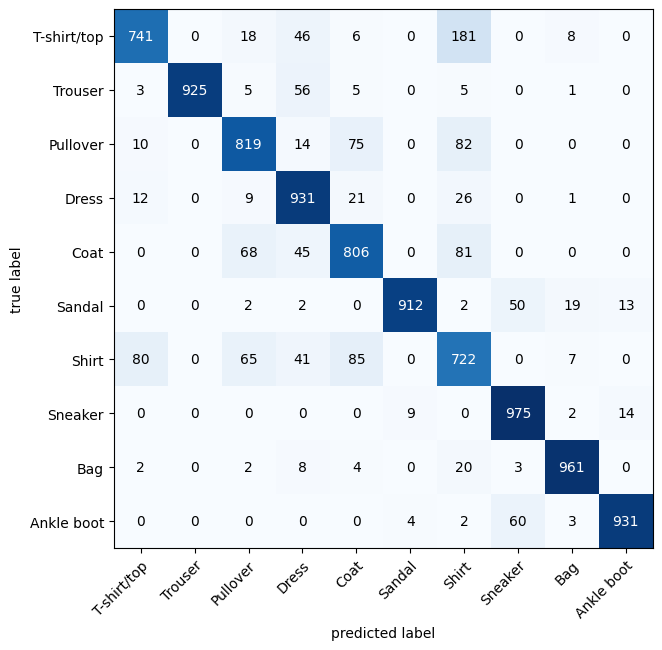

In [145]:
#plot  plot plot plot
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(
    conf_mat=conf_mat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

In [148]:
from pathlib import Path
model_path=Path("models")
model_path.mkdir(parents=True,exist_ok=True)
Model_name = "cnn_model.pth"
model_save_path = model_path/Model_name
#model_save_path
torch.save(obj=model_cnn.state_dict(),f = model_save_path)